Notebook to do binary classification on a random dataset

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [2]:
data = make_classification(n_samples=5000, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0,
                           n_classes=2, 
                           n_clusters_per_class=1, 
                           weights=None, 
                           flip_y=0.01, 
                           class_sep=1.5, 
                           hypercube=True, 
                           shift=0.0, 
                           scale=1.0, 
                           shuffle=True, 
                           random_state=None)

In [3]:
X = data[0][:, :2]
y = data[1]

In [4]:
#splitting the data before any operations helps to reduce any form of leakage
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

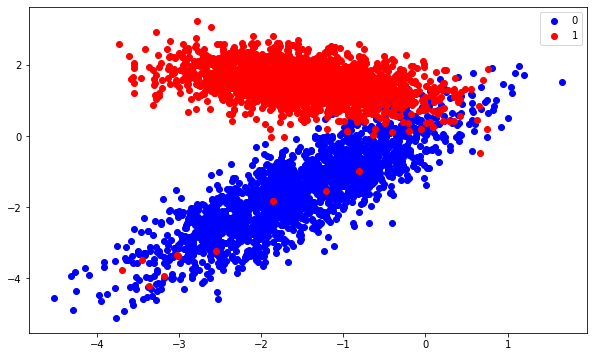

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='b', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='r', label='1')
plt.legend();

In [6]:
def sigmoid(z):
    '''
    Calculate the sigmoid of the input vector
    '''
    
    z = 1/(1+np.exp(-z))
    
    return z

In [7]:
def compute(X,y,theta):
    '''
    Base of the logistic regression model
    Computes the cost and the gradient
    Inputs - 
    
    X: features
    y: label/output
    theta: parameters
    
    Outputs:
    J: cost calculated
    grad: gradient to adjust parameters (move up/down)
    '''
    m=y.shape[0]
    
    z = np.dot(X, theta)
    hyp = sigmoid(z)

    J = (1/m)*sum(np.dot(-y.T, np.log(hyp)) - np.dot((1-y).T, np.log(1-hyp)))

    #y has the shape (150,)
    #need to reshape it to (150,1) to
    #calculate grad
    y=np.array(y).reshape(y.shape[0],1)
    grad = (1/m)*np.dot(X.T, (hyp-y))
    
    return J, grad

In [8]:
def add_intercept(X):
    '''
    Add an intercept term to input X
    to accodomate the w0 term
    '''
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [9]:
def predict(X, theta):
    '''
    Predict the output of the model (1/0)
    '''
    z = sigmoid(np.dot(X, theta))
    return (z>=0.5).astype(int).reshape(y_test.shape)

In [10]:
def train(X, y, X_test, y_test, num_iter=1000, learning_rate=0.01):
    '''
    Main function used for training the classifier
    Returns 2 things
    1. a dictionary called "history" to be used for plotting purposes
    2. "theta" - a list of optimized parameters used for prediction purposes
    '''
    #initialize the parameters before starting the iteration
    #using X.shape[1] since each "feature" has it's own parameter
    #and not each input row 

    theta=np.zeros((X.shape[1]+1, 1))
    X=add_intercept(X)
    X_test=add_intercept(X_test)
    
    history={"cost":[], "predictions":[]}
    for iteration in range(num_iter):
        
        cost, gradient = compute(X, y, theta)
        theta = theta - (learning_rate*gradient)
        
        history["cost"].append(cost)
        
        
        preds=predict(X_test, theta)
        history["predictions"].append(accuracy_score(preds,y_test))
    return history, theta

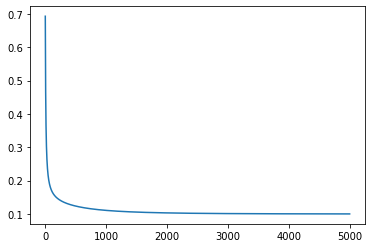

In [11]:
#play with the num_iter and learning_rate parameters to change the curve plotted below
cost, theta = train(X_train, y_train, X_test, y_test, num_iter=5000, learning_rate=0.1)
plt.plot(cost["cost"])

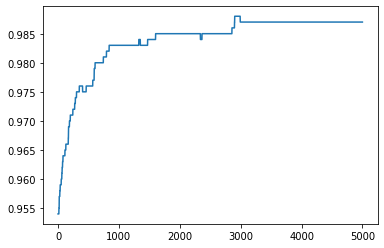

In [12]:
plt.plot(cost["predictions"])

In [13]:
def plot_figure(X, y, theta):
    '''
    A function that plots the figure with boundary(may need to change the limits in the function itself)
    Inputs: 
    X - input data
    y - feature
    theta - parameters learned through training
    
    outputs - None
    '''
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
    plt.legend();
    ax = plt.gcf().get_axes()
    # ax.autoscale(False)
    theta_ = theta[:,0]  # Make theta a 1-d array.
    x_ = np.linspace(-4, 5, 50)#play with this feature to get the appropriate limits (zoom in/out)
    # x_ = np.array(ax.get_xlim())
    y_ = -(theta_[0] + theta_[1]*x_)/theta_[2]
    plt.plot(x_, y_)
    
    return None

Modify the below function to plot different data.
Valid inputs :

X, y, theta - for entire dataset

X_train, y_train, theta - for training dataset

X_test, y_test, theta - for testing dataset (kept separate)

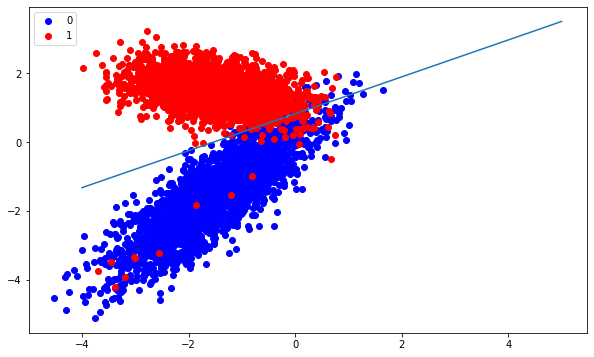

In [14]:
plot_figure(X, y, theta)